# plotting GAIA stars on one LCOGT image

La Cumbres FITS header explanation:

https://lco.global/documentation/data/fits-headers/

What the BANZAI pipeline does:

https://lco.global/documentation/data/BANZAIpipeline/ 

Object identification and extraction is through the SEP pipeline:

CAT: the catalog of sources detected by SEP in a FITS binary table. The catalog lists the pixel positions (X, Y), semi-major and semi-minor axes (A, B), positions angles (THETA), fluxes and errors (FLUX, FLUXERR) of each source.

AND the BANZAI object identification table:

https://sep.readthedocs.io/en/v1.1.x/tutorial.html


In [36]:
from astropy.coordinates import Angle

from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib import cm
from astropy.io import ascii

In [37]:
r_mag = ascii.read('gaia_stars.ecsv')

In [38]:
r_mag

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,
int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64
1635721458409799680,Gaia DR2 5539970601632026752,5539970601632026752,1683136744,2015.5,123.84702812628771,0.013789527233899384,-38.98977516121575,0.01422880019026927,1.7281038832094247,0.0177289582085643,97.47352,-9.753877542724986,0.02898979971215618,7.343200615667013,0.02792721652061782,0.06500024,-0.17085956,-0.24116898,-0.004675992,0.26239553,0.02645566,-0.15293187,0.17859578,-0.09521565,0.08756163,236,0,236,0,-4.6845016,143.74515,0.0,0.0,31,False,105.95779,1.609989770236654,0.0038742704087892806,-0.019179007,27,16,0.03722054,0,29,False,254,83682.20461791744,39.482805766139975,2119.4595,13.381783,28,45070.581885785316,116.76986431352246,385.97784,13.716656,28,56055.52963643909,79.45475627639881,705.5025,12.890374,1.2084543,0,0.82628155,0.3348732,0.49140835,--,--,0,--,--,--,NOT_AVAILABLE,256.3589881759861,-2.242886706980212,141.69216727100593,-56.516180401652676,100001,5816.3335,5797.6665,5902.0,0.0857,0.017,0.195,0.047,0.0079,0.1007,200111,1.0347958,1.004974,1.04147,1.1040817,1.0720708,1.1360927,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+5539970601632026752,0.00040976969754023167
1635721458409799680,Gaia DR2 5539970597334497024,5539970597334497024,1143415042,2015.5,123.84577119051367,0.05427346570628281,-38.99013055477085,0.05355766341352682

<IPython.core.display.Javascript object>


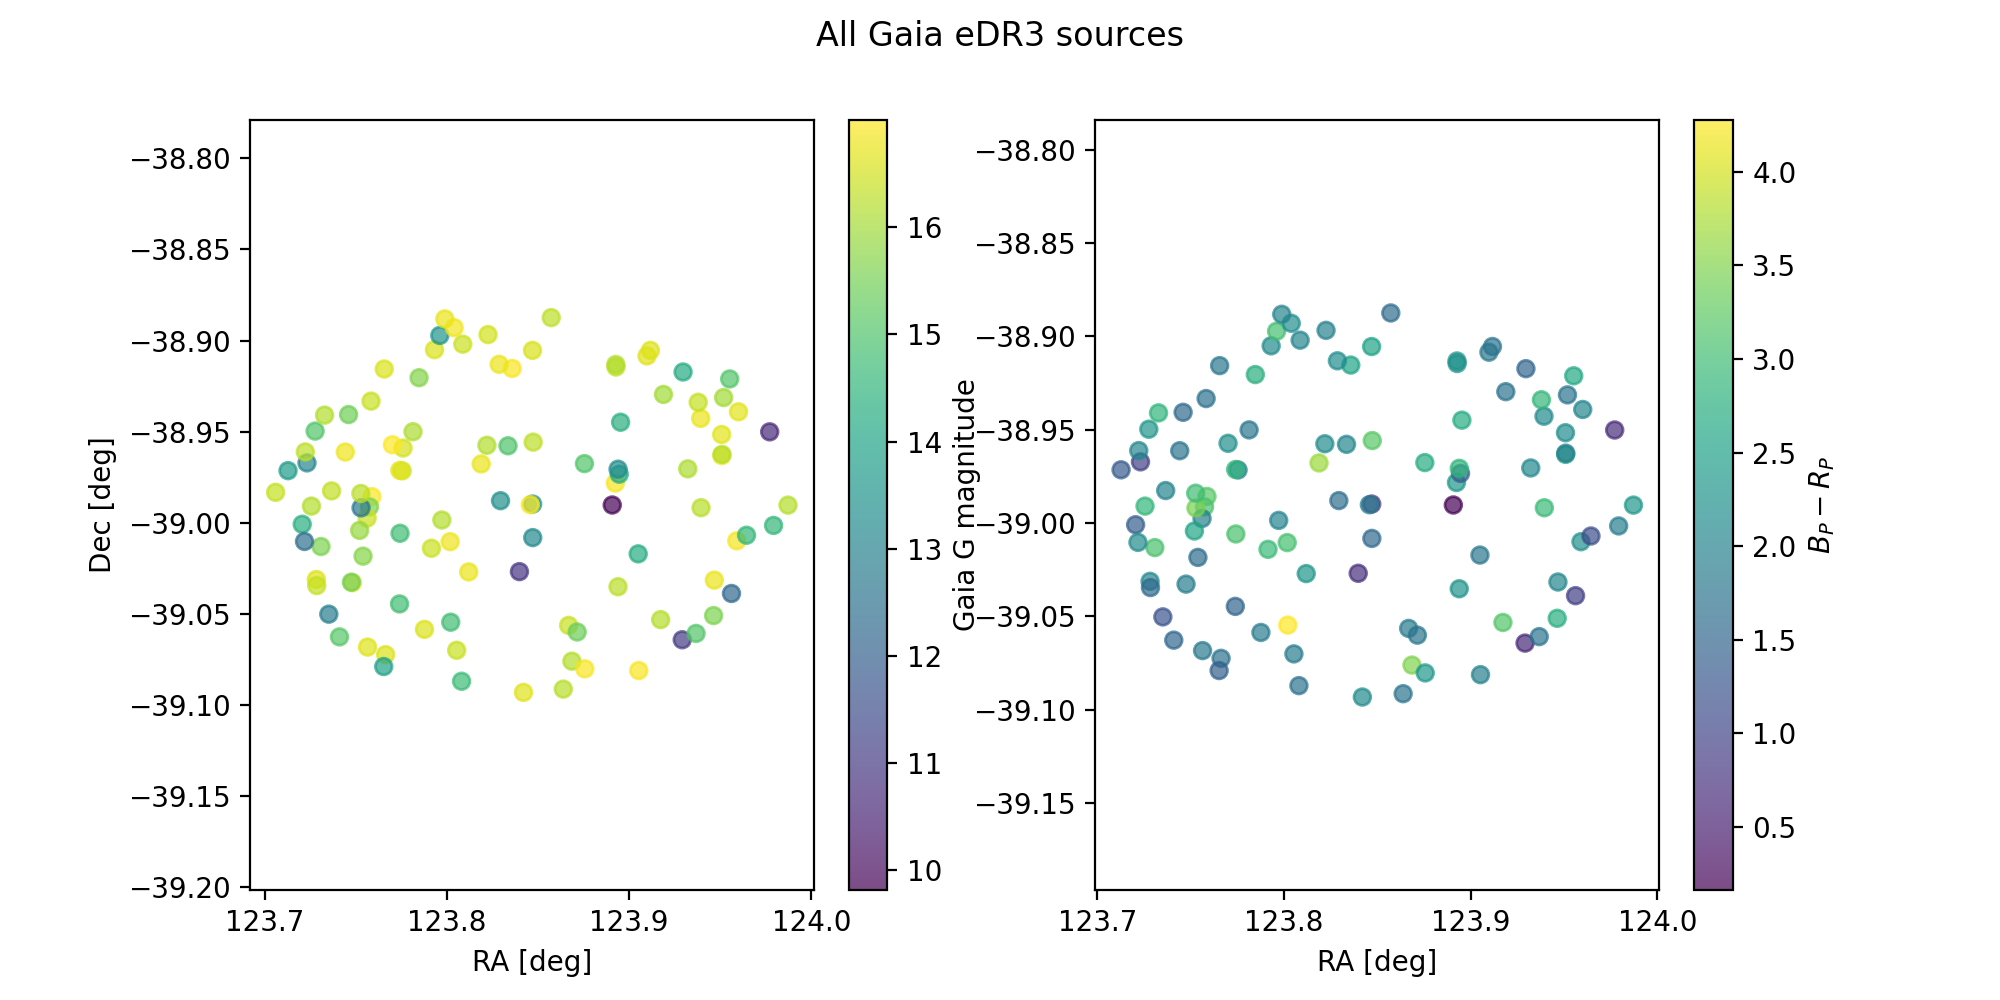

In [39]:
fi, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

sc = ax1.scatter(r_mag['ra'],r_mag['dec'],c=r_mag['phot_g_mean_mag'],alpha=0.7,cmap=plt.get_cmap('viridis'))
ax1.axis('equal')

ax1.set_xlabel('RA [deg]')
ax1.set_ylabel('Dec [deg]')

cbar = plt.colorbar(sc,ax=ax1)
cbar.set_label('Gaia G magnitude')


sc2 = ax2.scatter(r_mag['ra'],r_mag['dec'],c=r_mag['bp_rp'],alpha=0.7,cmap=plt.get_cmap('viridis'))
ax2.axis('equal')

ax2.set_xlabel('RA [deg]')
#ax2.set_ylabel('Dec [deg]')
fi.suptitle('All Gaia eDR3 sources')

cbar = plt.colorbar(sc2,ax=ax2)
cbar.set_label('$B_P - R_P$')

In [26]:
from astropy.io import fits
from astropy import wcs

imname = 'data/lco/lsc1m009-fa04-20211105-0199-e91.fits.fz'
print('opening {}'.format(imname))
hdu1 = fits.open(imname)

imh = hdu1['SCI'].header
image = hdu1['SCI'].data

epoch = imh['MJD-OBS']
print('{:.5f} MJD'.format(epoch))

# read in photometric data FITS table
objects = hdu1['CAT'].data


opening data/lco/lsc1m009-fa04-20211105-0199-e91.fits.fz
59524.35846 MJD


In [27]:
len(objects)

1546

In [28]:
# Parse the WCS keywords in the primary HDU
w = wcs.WCS(hdu1['SCI'].header)


Set OBSGEO-B to   -30.167330 from OBSGEO-[XYZ].
Set OBSGEO-H to     2197.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [29]:
phot['y']

array([ 853.75661604, 3596.11401847, 4044.99311001, ..., 4064.92479025,
       4069.72407886,   34.73371043])

<IPython.core.display.Javascript object>


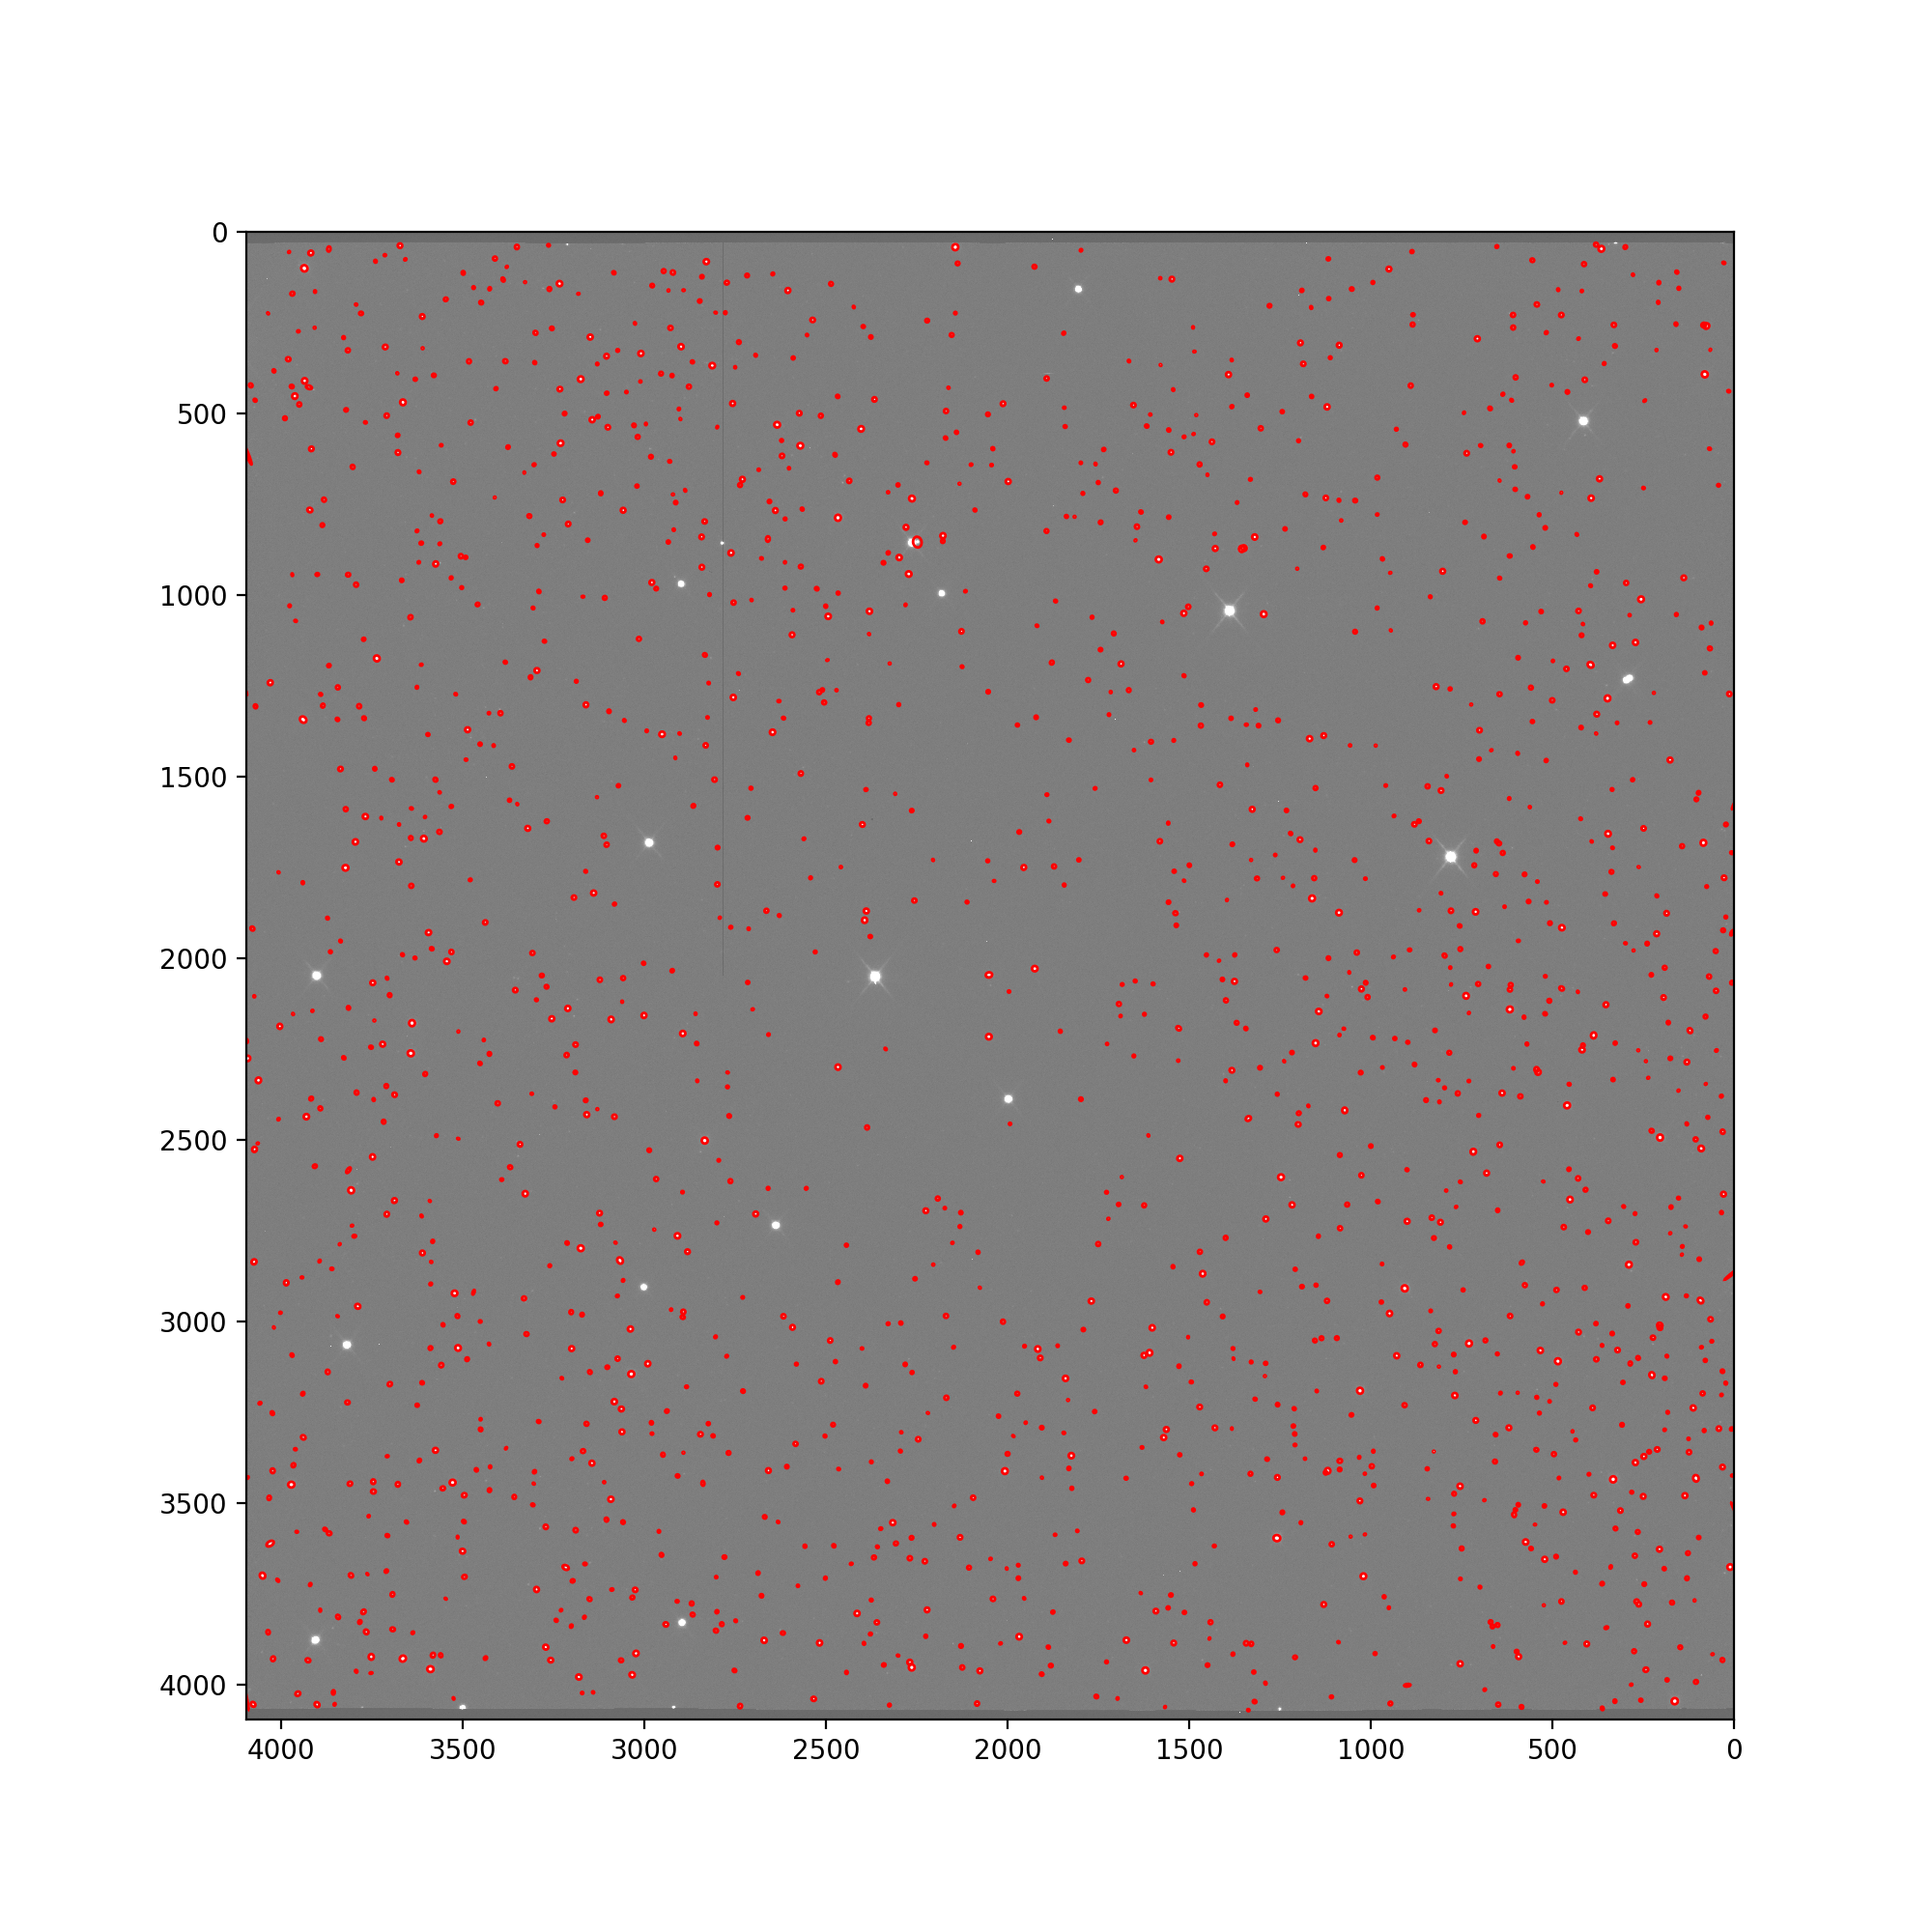

In [41]:
from matplotlib.patches import Ellipse


data_sub = image
fig, ax = plt.subplots(figsize=(10,10))
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

ax.invert_yaxis()
ax.invert_xaxis()

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [35]:
objects.dtype.names


('x',
 'y',
 'xwin',
 'ywin',
 'xpeak',
 'ypeak',
 'flux',
 'fluxerr',
 'peak',
 'fluxaper1',
 'fluxerr1',
 'fluxaper2',
 'fluxerr2',
 'fluxaper3',
 'fluxerr3',
 'fluxaper4',
 'fluxerr4',
 'fluxaper5',
 'fluxerr5',
 'fluxaper6',
 'fluxerr6',
 'background',
 'fwhm',
 'a',
 'b',
 'theta',
 'kronrad',
 'ellipticity',
 'fluxrad25',
 'fluxrad50',
 'fluxrad75',
 'x2',
 'y2',
 'xy',
 'flag',
 'ra',
 'dec',
 'mag',
 'magerr')